In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Step 1: Load the dataset
df = pd.read_csv('property.csv')

In [2]:
df.columns

Index(['item_id', 'deposit', 'monthly_rent', 'district_uuid', 'room_qty',
       'unit_area', 'has_elevator', 'building_floor_count', 'unit_floor',
       'has_storage_area', 'property_age'],
      dtype='object')

In [3]:
df.shape

(4930, 11)

In [9]:
# Step 2: Train-Test Split
# Assuming we want to forecast the last 12 months
train_data = df[['monthly_rent','deposit']].copy()

In [10]:
# Splitting the data into training and testing sets
train_size = int(0.8 * len(train_data))
train_set = train_data.iloc[:train_size]
test_set = train_data.iloc[train_size:]

In [12]:
# Step 3: Model Training
# ARIMA model parameters (p, d, q)
p = 5  # AR (AutoRegressive) order
d = 1  # I (Integrated) order (to make the series stationary)
q = 0  # MA (Moving Average) order
models = {}
for col in train_set.columns:
    model = ARIMA(train_set[col], order=(p, d, q))
    fitted_model = model.fit()
    models[col] = fitted_model

In [13]:
# Step 4: Forecasting
# Forecasting the next 12 months for each column
forecasts = {}
for col, model in models.items():
    forecast = model.forecast(steps=12)
    forecasts[col] = forecast

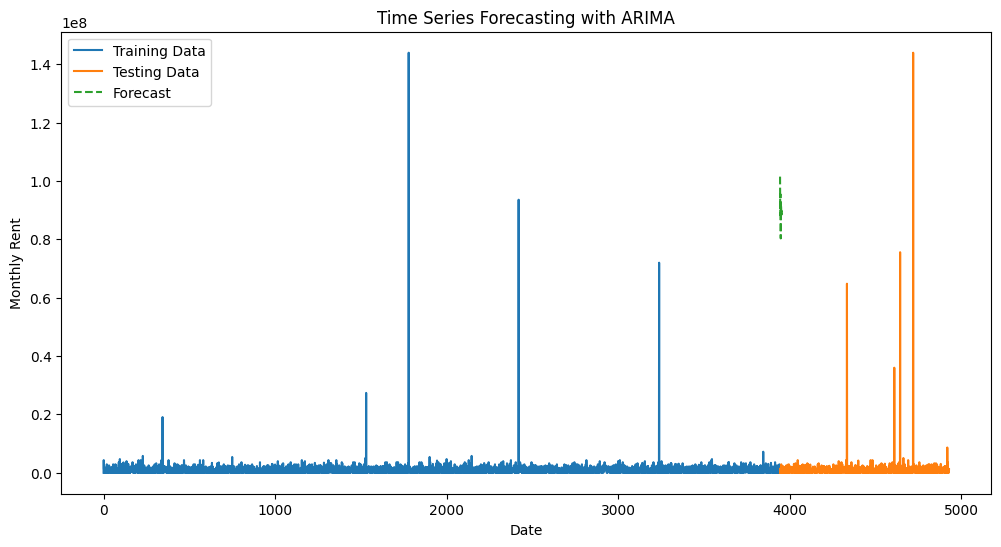

In [17]:
# Step 5: Visualization
plt.figure(figsize=(12, 6))
plt.plot(train_set.index, train_set['monthly_rent'], label='Training Data')
plt.plot(test_set.index, test_set['monthly_rent'], label='Testing Data')
plt.plot(forecast.index, forecast, label='Forecast', linestyle='--')
plt.title('Time Series Forecasting with ARIMA')
plt.xlabel('Date')
plt.ylabel('Monthly Rent')
plt.legend()
plt.show()

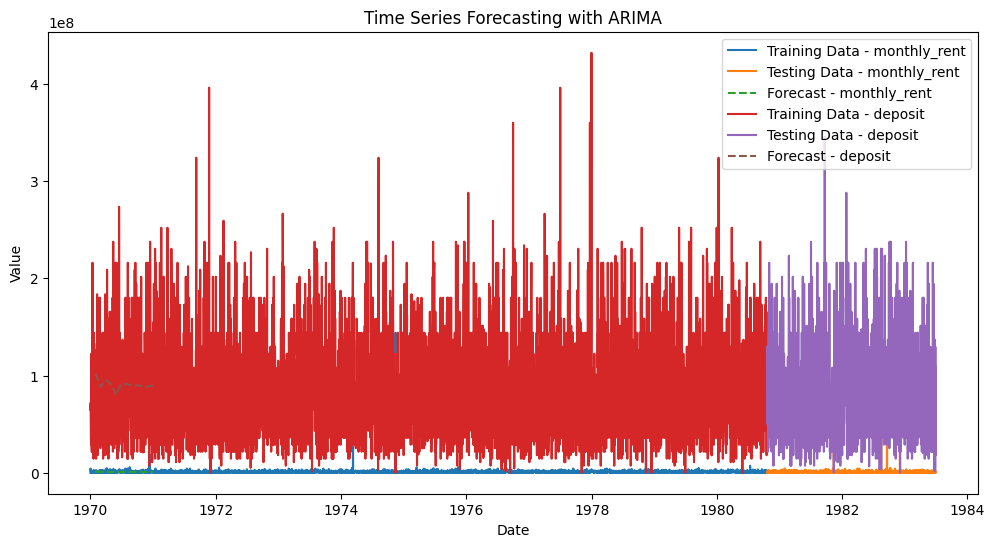

In [16]:
# Step 5: Visualization
plt.figure(figsize=(12, 6))
for col in train_set.columns:
    plt.plot(train_set.index, train_set[col], label=f'Training Data - {col}')
    plt.plot(test_set.index, test_set[col], label=f'Testing Data - {col}')
    forecast_index = pd.date_range(start=test_set.index[0], periods=12, freq='M')
    plt.plot(forecast_index, forecasts[col], label=f'Forecast - {col}', linestyle='--')
plt.title('Time Series Forecasting with ARIMA')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()
